In [1]:
%matplotlib inline
# %matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pickle
from IPython.display import HTML

from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rcParams.update({'font.size': 20})

In [63]:
plt.tight_layout()

def plot_line(x, fname='', legend=True):
    line_opt=dict(linewidth=3, markersize=12)
    fig = plt.figure(figsize=(10, 7))
    axes = fig.add_subplot(1, 1, 1)
    
#     axes.set_xlim(xmin * inc_factor, xmax * inc_factor)
    axes.set_ylim(-1, 13)
    axes.set_xlim(-1, len(x))
    
    axes.spines['right'].set_color('black')
    axes.spines['top'].set_color('black')
    axes.spines['left'].set_color('black')
    axes.spines['bottom'].set_color('black')
    
    axes.spines['right'].set_linewidth(3)
    axes.spines['top'].set_linewidth(3)
    axes.spines['left'].set_linewidth(3)
    axes.spines['bottom'].set_linewidth(3)
    
    axes.tick_params(labelsize=30)

    # plot arrow
    # print(len(plot_x) - 1)
    axes.plot(range(len(x)), x['kl'], label=r"$D_{KL}(q_\phi(z | x) || p(z))$", marker='o', **line_opt)
    axes.plot(range(len(x)), x['mi'], label=r"$I_q$", marker='v', **line_opt)
    axes.plot(range(len(x)), x['kl'] - x['mi'], label=r"$D_{KL}(q_\phi(z) \| p(z))$", marker='s', **line_opt)
    if legend:
        axes.legend(loc='upper left', prop={'size': 30})
    axes.set_xlabel('epoch', fontsize=40)
    print(len(x))
    x_ticks = range(0, len(x) + 1, 10)
    axes.set_xticks(x_ticks)
    axes.set_yticks(range(0, 13, 2))
    axes.set_xticklabels([str(i * 2) for i in x_ticks])
    if fname != '':
        fig.savefig(fname, bbox_inches='tight')
    
    plt.show()

<Figure size 432x288 with 0 Axes>

In [28]:
from numpy import genfromtxt
anneal = genfromtxt('vae-anneal-86879_1.out', delimiter=',', names=True)
beta = genfromtxt('betaVAE_yelp_burn0_constlen_ns1_Beta0.2_0_0_783435_log_val.csv', delimiter=',', names=True)
our = genfromtxt('vae-our-87562_1.out', delimiter=',', names=True)


In [29]:
print(anneal['kl'].shape, anneal['mi'].shape)
print(beta['kl'].shape, beta['mi'].shape)
print(our['kl'].shape, our['mi'].shape)
anneal = anneal[::2]
beta = beta[::2]
our = our[::2]
x_anneal = range(len(anneal))
x_beta = range(len(beta))
x_our = range(len(our))
print(len(anneal))
anneal

(59,) (59,)
(46,) (46,)
(60,) (60,)
30


array([(0.    ,  0.    ), (2.8814,  0.5272), (2.2007,  0.5466),
       (1.2544,  0.4134), (1.0833,  0.3556), (0.71  ,  0.3258),
       (0.713 ,  0.1699), (0.7302,  0.2345), (0.6464,  0.2571),
       (0.6515,  0.1812), (0.6992,  0.2134), (0.6057,  0.1519),
       (0.5122,  0.1285), (0.5489,  0.0267), (0.295 ,  0.2406),
       (0.2365,  0.1025), (0.2354,  0.0254), (0.2001,  0.033 ),
       (0.1701,  0.0233), (0.0731,  0.0572), (0.0573,  0.0332),
       (0.0482,  0.0254), (0.044 , -0.0963), (0.0189, -0.0359),
       (0.0159,  0.0293), (0.0145, -0.0014), (0.0132, -0.078 ),
       (0.0084, -0.0407), (0.006 ,  0.0294), (0.0052, -0.0083)],
      dtype=[('kl', '<f8'), ('mi', '<f8')])

30


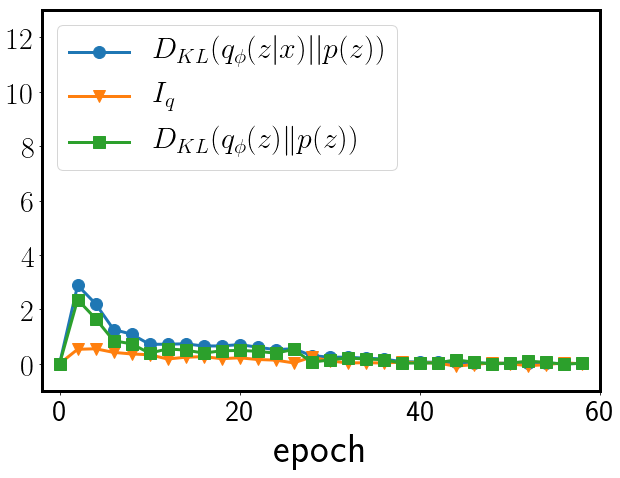

In [64]:
plot_line(anneal, fname='anneal_mi.pdf')

23


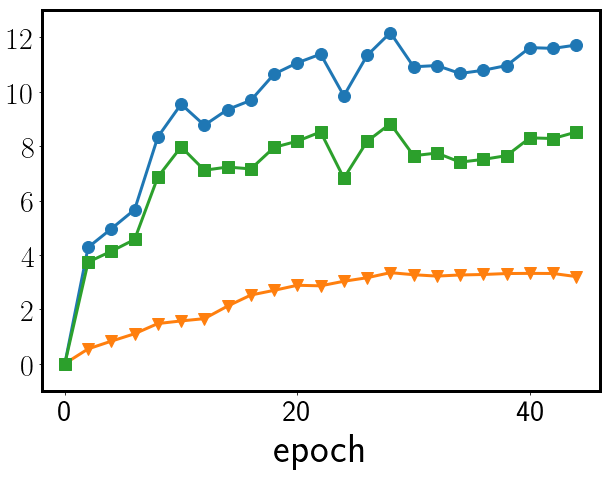

In [65]:
plot_line(beta, fname='beta_mi.pdf', legend=False)

30


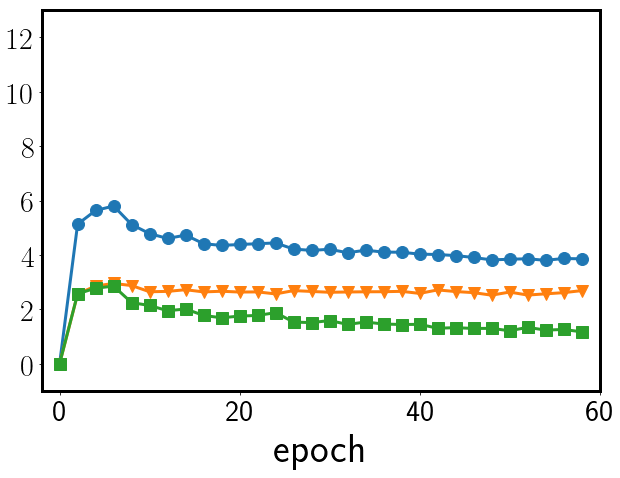

In [66]:
plot_line(our, fname='our_mi.pdf', legend=False)

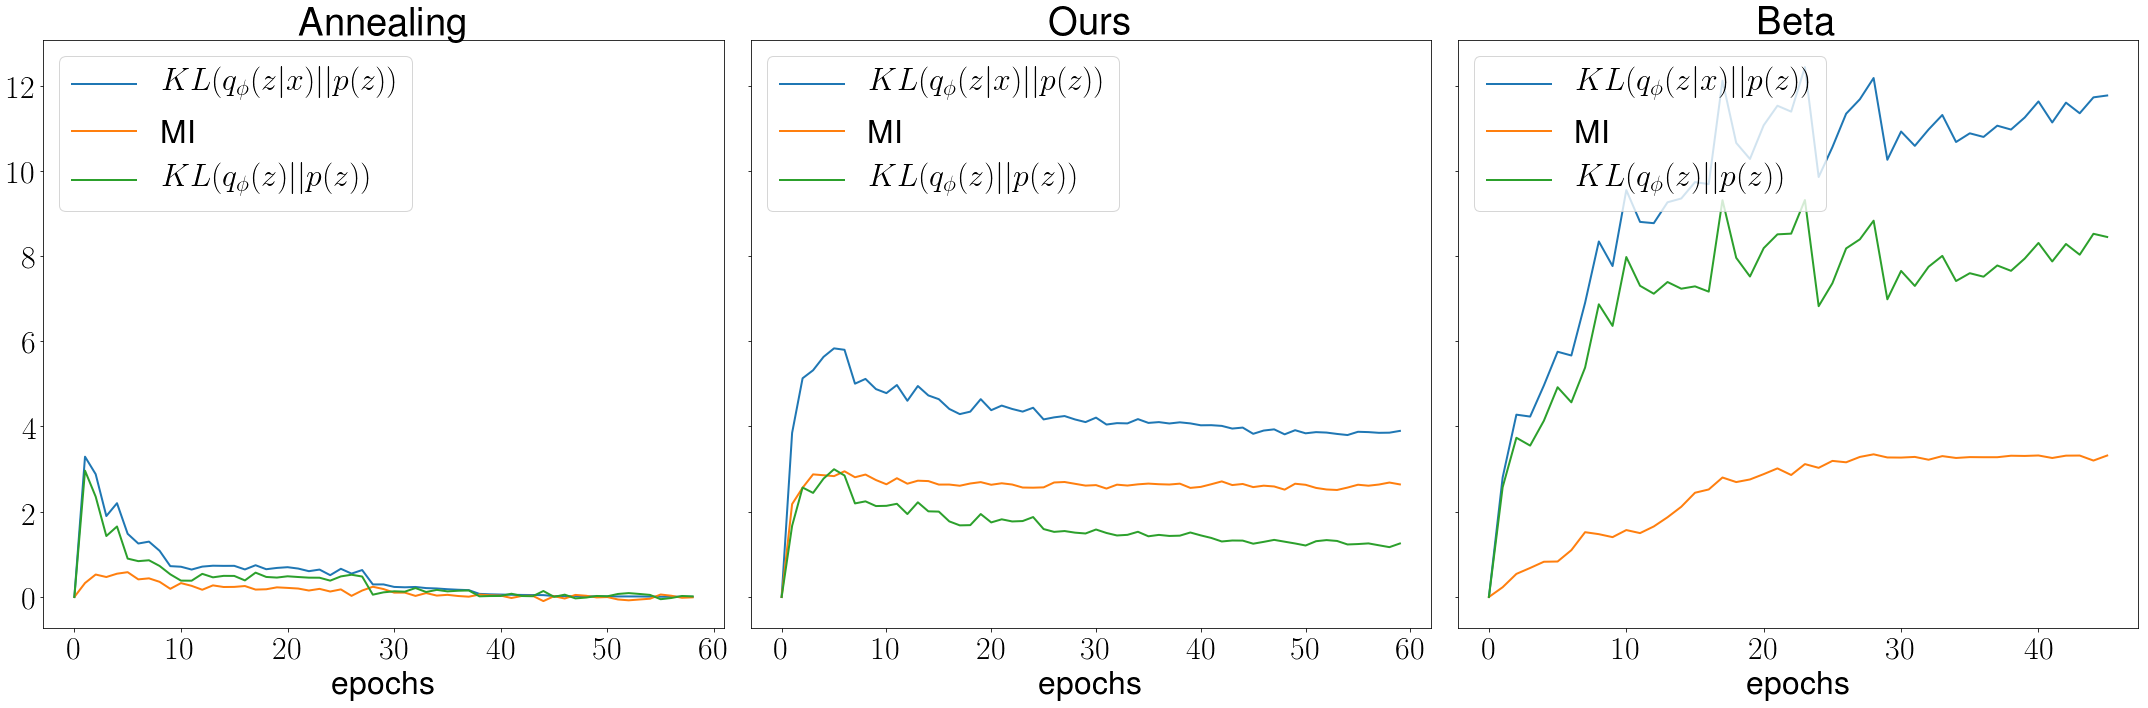

In [173]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
kl_1= ax1.plot(x_anneal, anneal['kl'], label=r"$KL(q_\phi(z|x) || p(z))$", linewidth=2)
mi_1 = ax1.plot(x_anneal, anneal['mi'], label=r"MI", linewidth=2)
kl2_1 = ax1.plot(x_anneal, anneal['kl']-anneal['mi'], label=r"$KL(q_\phi(z) || p(z))$", linewidth=2)
ax1.set_title('Annealing')

ax2.plot(x_our, our['kl'], label=r"$KL(q_\phi(z|x)||p(z))$", linewidth=2)
ax2.plot(x_our, our['mi'], label=r"MI", linewidth=2)
ax2.plot(x_our, our['kl']-our['mi'], label=r"$KL(q_\phi(z) || p(z))$", linewidth=2)
ax2.set_title('Ours')

ax3.plot(x_beta, beta['kl'], label=r"$KL(q_\phi(z|x) || p(z))$", linewidth=2)
ax3.plot(x_beta, beta['mi'], label=r"MI", linewidth=2)
ax3.plot(x_beta, beta['kl']-beta['mi'], label=r"$KL(q_\phi(z)|| p(z))$", linewidth=2)
ax3.set_title('Beta')

ax1.set_xlabel('epochs')
ax2.set_xlabel('epochs')
ax3.set_xlabel('epochs')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')
f.set_figwidth(30)
f.set_figheight(10)
plt.savefig('mi.png', dpi=600)
plt.tight_layout(pad=0.4, w_pad=0.5)
plt.show()

In [171]:
plt.savefig('mi.png', dpi=300)

<Figure size 432x288 with 0 Axes>